## Движение тел в потенциальном поле сил


В рамках классической теории сила притяжения двух тел определяется законом Ньютона:

$$
\vec{F}(\vec{r}_1, \vec{r}_2)=-G m_1 m_2 \frac{\vec{r}_1 - \vec{r}_2}{|\vec{r}_1 - \vec{r}_2|^3},
$$

Воспользовавшись вторым законом Ньютона запишем ускорение для каждой частицы:

$$
\vec{a}_n = \vec{F}_n/m_n = -G \sum_{k \neq n} m_k \frac{\vec{r}_n - \vec{r}_k}{|\vec{r}_n - \vec{r}_k|^3}.
$$

Вспоминая, что ускорение — это вторая производная координаты по времени, получим дифференциальное уравнение второго порядка в частных производных, которое необходимо решить для получения траектории каждого тела:

$$
\frac{\partial^2 \vec{r}_n }{\partial t^2} = f_n =-G \sum_{k \neq n} m_k \frac{\vec{r}_n - \vec{r}_k}{|\vec{r}_n - \vec{r}_k|^3}.
$$

In [ ]:
using NBodySimulator, Plots, StaticArrays
cd("C:\\Users\\User\\Desktop\\Mycop\\Plots")
plot(sin) # tormoznutoe gavno

In [2]:
distcs = [ 0.0, 0.367, 0.723, 1.0, 1.5237, 5.2, 9.54, 19.2, 30.0, 39.4 ] # a.u.
masses = [ 1.9891e30, 3.3e23, 4.87e24, 5.976e24, 6.4e23, 1.9e27, 5.68e26, 8.7e25, 1e26, 1.3e22 ]
masses ./= masses[4]

velses = [ 0.0, 47.8, 35.0, 29.8, 24.1, 13.0, 9.6, 6.8, 5.4, 4.7 ] # km/s
sec2year = 3600*24*365
velses .*= sec2year # km/year
au = 149.6e6 # km
velses ./= au # au/year
[masses distcs velses]

10×3 Array{Float64,2}:
   3.32848e5    0.0      0.0    
   0.0552209    0.367   10.0763 
   0.814926     0.723    7.37807
   1.0          1.0      6.2819 
   0.107095     1.5237   5.08033
 317.938        5.2      2.74043
  95.0469       9.54     2.0237 
  14.5582      19.2      1.43345
  16.7336      30.0      1.13833
   0.00217537  39.4      0.99077

In [7]:
# body = MassBody(r,v,mass)
bodies = [ MassBody(SVector(distcs[i], 0.0, 0.0), 
                    SVector(0, velses[i], 0.0), masses[i]) for i in 1:10 ];

In [3]:
emass = 5.97e24 # kg Earth mass

G = 6.673e-11 # m^3 / kg c^2
G *= emass*sec2year^2 / (1000au)^3 # a.u.^3 / emass eyear^2

0.00011833518368997721

In [8]:
system = GravitationalSystem(bodies, G)
tspan = (0.0, 25.0)

(0.0, 25.0)

In [9]:
simulation = NBodySimulation(system, tspan)

Timespan: (0.0, 25.0)
Boundary conditions: InfiniteBox{Float64}([-Inf, Inf, -Inf, Inf, -Inf, Inf])
Potentials: 
Gravitational:
	G:0.00011833518368997721


In [10]:
# DPRKN6 - 6th order explicit adaptive Runge-Kutta-Nyström method. Free 6th order interpolant.
sim_result = run_simulation(simulation, DPRKN6())

N: 10
Timespan: (0.0, 25.0)
Boundary conditions: InfiniteBox{Float64}([-Inf, Inf, -Inf, Inf, -Inf, Inf])
Potentials: 
Gravitational:
	G:0.00011833518368997721
Time steps: 1064
t: 0.0, 25.0


In [12]:
t = 0:0.05:sim_result.solution.t[end-1]
length(t)

500

In [13]:
Xs = [ get_position(sim_result, ti)[1,i] for ti in t, i = 1:10 ]
Ys = [ get_position(sim_result, ti)[2,i] for ti in t, i = 1:10 ];
Zs = [ get_position(sim_result, ti)[3,i] for ti in t, i = 1:10 ];

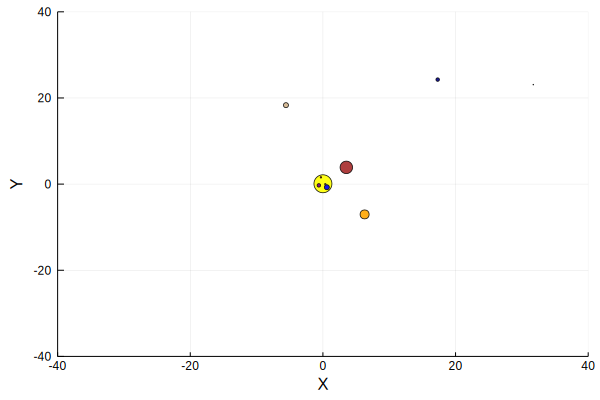

In [22]:
#### sizes = [10, 1, 2, 3, 1, 7, 5, 3, 2, 1]
clrs = [:yellow, :pink, :purple, :blue, :red, :brown, :orange, :tan, :darkblue, :black]
labs = ["Sol", "Mer", "Ven", "Geo", "Mar", "Jup", "Sat", "Urn", "Nep", "Plu"]
R = 40
k = 500
    plot()
    for i = 1:10
        scatter!([Xs[k,i]], [Ys[k,i]],# [Zs[1,i]], 
            xaxis=("X", (-R, R), -R:20:R),
            yaxis=("Y", (-R, R), -R:20:R), 
            #zaxis=("Z", (-1, 1), -1:0.5:1),
            marker=(sizes[i], 0.9, clrs[i]), legend = false )
    end
plot!()

In [23]:
sizes = [10, 1, 2, 3, 1, 7, 5, 3, 2, 1]
clrs = [:yellow, :pink, :purple, :blue, :red, :brown, :orange, :tan, :darkblue, :black]
labs = ["Sol", "Mer", "Ven", "Geo", "Mar", "Jup", "Sat", "Urn", "Nep", "Plu"]
R = 40
for k = 1:4:length(t)
    plot()
    for i = 1:10
        scatter!([Xs[k,i]], [Ys[k,i]],# [Zs[1,i]], 
            xaxis=("X", (-R, R), -R:20:R),
            yaxis=("Y", (-R, R), -R:20:R), 
            #zaxis=("Z", (-1, 1), -1:0.5:1),
            marker=(sizes[i], 0.9, clrs[i]), legend = false )
    end
    savefig("plot$k.png")
end

In [24]:
sizes = [10, 1, 2, 3, 1, 7, 5, 3, 2, 1]
clrs = [:yellow, :pink, :purple, :blue, :red, :brown, :orange, :tan, :darkblue, :black]
labs = ["Sol", "Mer", "Ven", "Geo", "Mar", "Jup", "Sat", "Urn", "Nep", "Plu"]
R = 40
for k = 1:4:length(t)
    plot()
    for i = 1:10
        scatter!([Xs[k,i]], [Ys[k,i]], [Zs[1,i]], 
            xaxis=("X", (-R, R), -R:20:R),
            yaxis=("Y", (-R, R), -R:20:R), 
            zaxis=("Z", (-1, 1), -1:0.5:1),
            marker=(sizes[i], 0.9, clrs[i]), legend = false )
    end
    savefig("plot$k.png")
end

![gifka](25years.gif)

Сотня звезд в плотном кубическом скоплении

In [10]:
N = 100 # number of bodies
m = 5.0e5 # mass of each of them in Earth mass
v = 4.0 # mean velocity a.u./year = 20km/s
L = 5.0 # size of the cell side in a.u.

bodies = generate_bodies_in_cell_nodes(N, m, v, L)
system = GravitationalSystem(bodies, G)
tspan = (0.0, 1.0) # Earth years
simulation = NBodySimulation(system, tspan)
@time sim_result = run_simulation(simulation , DPRKN6()) #

576.554907 seconds (22.72 G allocations: 509.558 GiB, 12.09% gc time)


N: 100
Timespan: (0.0, 1.0)
Boundary conditions: InfiniteBox{Float64}([-Inf, Inf, -Inf, Inf, -Inf, Inf])
Potentials: 
Gravitational:
	G:0.00011833518368997721
Time steps: 37047
t: 0.0, 1.0


In [11]:
tfin = sim_result.solution.t[end-1]
t = range(0, length = 100, stop = tfin)

0.0:0.010100984597176905:0.9999974751205136

In [12]:
Xs = [ get_position(sim_result, ti)[1,i] for ti in t, i = 1:N ]
Ys = [ get_position(sim_result, ti)[2,i] for ti in t, i = 1:N ];
Zs = [ get_position(sim_result, ti)[3,i] for ti in t, i = 1:N ];
clrs = [:yellow, :red, :blue, :orange, :white]

5-element Array{Symbol,1}:
 :yellow
 :red   
 :blue  
 :orange
 :white 

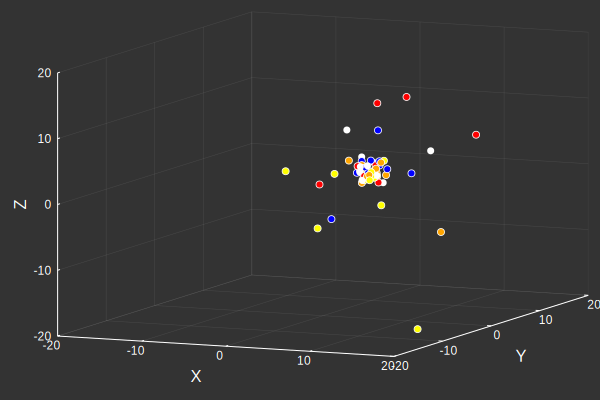

In [15]:
k = 100
    plot(background_color=RGB(0.2, 0.2, 0.2), legend = false)
    for i = 1:100
        scatter!([Xs[k,i]], [Ys[k,i]], [Zs[k,i]], 
            xaxis=("X", (-4L, 4L), -4L:10:4L),
            yaxis=("Y", (-4L, 4L), -4L:10:4L), 
            zaxis=("Z", (-4L, 4L), -4L:10:4L), color = clrs[i%5+1] )
    end
    plot!()

In [17]:
for k = 1:length(t)
    plot(background_color=RGB(0.2, 0.2, 0.2), legend = false)
    for i = 1:100
        scatter!([Xs[k,i]], [Ys[k,i]], [Zs[k,i]], 
            xaxis=("X, a.u.", (-4L, 4L), -4L:10:4L),
            yaxis=("Y, a.u.", (-4L, 4L), -4L:10:4L), 
            zaxis=("Z, a.u.", (-4L, 4L), -4L:10:4L), color = clrs[i%5+1] )
        title!("$(round(t[k], digits = 2)) Earth years")
    end
    savefig("plot$k.png")
end

In [ ]:
]add StochasticDiffEq

  Updating registry at `C:\Users\User\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  99.9 %0.0 %>                  ]  54.0 % Resolving package versions...
 Installed ArrayInterface ─────────────── v2.6.2
 Installed OpenBLAS_jll ───────────────── v0.3.9+0
 Installed CompilerSupportLibraries_jll ─ v0.3.1+0
 Installed MMTF ───────────────────────── v0.1.0
 Installed FiniteDiff ─────────────────── v2.3.0
 Installed Roots ──────────────────────── v1.0.1
 Installed DoubleFloats ───────────────── v1.1.6
 Installed ImageCore ──────────────────── v0.8.12


┌ Info: Replacing symlinks in tarball by their source files ...
│ "JuliaImages-ImageCore.jl-c6028e9\\docs\\src\\LICENSE.md" => "JuliaImages-ImageCore.jl-c6028e9\\docs\\src\\../../LICENSE.md"
└ @ Pkg.PlatformEngines D:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.3\Pkg\src\PlatformEngines.jl:755


 Installed MacroTools ─────────────────── v0.5.5
 Installed Inflate ────────────────────── v0.1.2
 Installed JSExpr ─────────────────────── v0.5.2
 Installed YaoBase ────────────────────── v0.13.3
 Installed ImageQualityIndexes ────────── v0.1.4
 Installed FileIO ─────────────────────── v1.2.4
 Installed MsgPack ────────────────────── v0.2.0
 Installed GenericSVD ─────────────────── v0.3.0
 Installed IterativeSolvers ───────────── v0.8.3
 Installed GenericSchur ───────────────── v0.4.0
 Installed QuantumOpticsBase ──────────── v0.1.4
 Installed PlotThemes ─────────────────── v1.0.2
 Installed CodecBzip2 ─────────────────── v0.7.1
 Installed Tokenize ───────────────────── v0.5.8
 Installed ComputationalResources ─────── v0.3.2
 Installed YAML ───────────────────────── v0.4.0
 Installed DiffEqBase ─────────────────── v6.25.1
 Installed OrdinaryDiffEq ─────────────── v5.32.0
 Installed MathOptInterface ───────────── v0.9.13
 Installed BioStructures ──────────────── v0.9.3


┌ Info: Replacing symlinks in tarball by their source files ...
│ "BioJulia-BioStructures.jl-4e1b6a7\\docs\\src\\index.md" => "BioJulia-BioStructures.jl-4e1b6a7\\docs\\src\\../../README.md"
└ @ Pkg.PlatformEngines D:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.3\Pkg\src\PlatformEngines.jl:755


 Installed Documenter ─────────────────── v0.24.7
